In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

2.3.1
True
0
NVIDIA GeForce GTX 1060


## Introduction to Tensors

### Creating Tensors

In [4]:
# a scalar is a 0 dimensional tensor
scalar = torch.tensor(9)
print(scalar.ndim)
print(scalar)
print(scalar.item())

0
tensor(9)
9


In [5]:
# an array is a 1 dimensonal tensor
e = torch.tensor(np.array([np.e,np.e]))
print(e.dim())
print(e)
print(e[1].item())

1
tensor([2.7183, 2.7183], dtype=torch.float64)
2.718281828459045


In [6]:
# an nD-array is an n dimensonal tenosr
e = torch.tensor(np.array([ [[0,1,2,3,4],
                             [5,6,7,8,9],
                             [10,11,12,13,14]],
                            
                            [[5,6,7,8,9],
                             [5,6,7,8,9],
                             [10,11,12,13,14]],
                          
                            [[0,1,2,3,4],
                             [5,6,7,8,9],
                             [10,11,12,13,14]] ]))

# here there are 3 dimensions
# tensors are a generalization of matrices
print(e)

# indexing is along the dimensions, outer-inner
print(e[0,2,2].item())

# get the number of dimensions
print(e.ndim)
# get the number of elements for each dimension (shape)
print(e.shape)


tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[ 5,  6,  7,  8,  9],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]])
12
3
torch.Size([3, 3, 5])


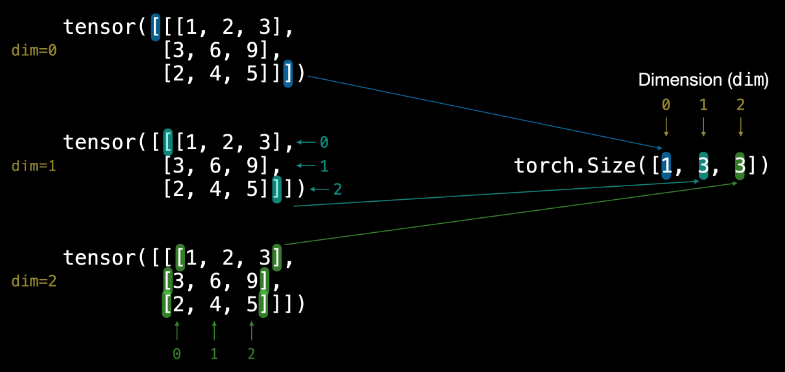

In [22]:
# creating a random tensor
t_random = torch.rand(size=(2,3,3))
print(t_random, t_random.dtype)
print()

# creating a zeros tensor
t_zeros = torch.zeros(size=(1,3,3))
print(t_zeros, t_zeros.dtype)
print()

# creating a ones tensor
t_ones = torch.zeros(size=(1,2,3))
print(t_ones, t_ones.dtype)


tensor([[[0.7227, 0.1017, 0.5629],
         [0.1595, 0.0417, 0.5711],
         [0.2066, 0.8092, 0.2818]],

        [[0.7192, 0.1898, 0.4710],
         [0.4345, 0.8002, 0.1270],
         [0.2026, 0.0506, 0.4522]]]) torch.float32

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]) torch.float32

tensor([[[0., 0., 0.],
         [0., 0., 0.]]]) torch.float32


In [36]:
t1 = t_random.clone().detach()
t1 = torch.ones_like(t1, dtype=torch.int)
t1

tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=torch.int32)

In [37]:
t1 = t1 + 4
t1 = t1 * 4
t1 = t1 / 2
print(t1, "\n")
print(f"t1 * t1 = {t1 * t1}")

tensor([[[10., 10., 10.],
         [10., 10., 10.],
         [10., 10., 10.]],

        [[10., 10., 10.],
         [10., 10., 10.],
         [10., 10., 10.]]]) 

t1 * t1 = tensor([[[100., 100., 100.],
         [100., 100., 100.],
         [100., 100., 100.]],

        [[100., 100., 100.],
         [100., 100., 100.],
         [100., 100., 100.]]])


In [49]:
# vector dot product using tensors
t1 = torch.arange(0,32,2)

print("t1 =")
print(t1)
print()
print(f"dimensions = {t1.ndim}, t1 shape = {t1.shape}")

t1 = t1.reshape([2,2,4])

print("t1 =")
print(t1)
print(f"dimensions = {t1.ndim}, t1 shape = {t1.shape}")

t1 =
tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

dimensions = 1, t1 shape = torch.Size([16])
t1 =
tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14]],

        [[16, 18, 20, 22],
         [24, 26, 28, 30]]])
dimensions = 3, t1 shape = torch.Size([2, 2, 4])


In [60]:
t1 = torch.arange(0,10,2).reshape([1,5])
t1_transpose = torch.transpose_copy(t1, dim0=1, dim1=0)

print(t1)
print(t1.shape, t1.ndim)
print()
print(t1_transpose)
print(t1_transpose.shape, t1_transpose.ndim)

print(t1.matmul(t1_transpose))

tensor([[0, 2, 4, 6, 8]])
torch.Size([1, 5]) 2

tensor([[0],
        [2],
        [4],
        [6],
        [8]])
torch.Size([5, 1]) 2
tensor([[120]])


In [16]:
# moving the tensors to the gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [17]:
data = [[1,2], [3,4]]
data1 = np.array(data)
x_data = torch.tensor(data)

In [18]:
data2 = np.random.randint(0, 10, (4,4))
x_data2 = torch.tensor(data2)

In [23]:
print(type(data))
print(type(data1))
print(type(data2))
print(type(x_data2[0,2].item()))
print(x_data2.shape)
print(x_data2.dtype)
x_data2

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'int'>
torch.Size([4, 4])
torch.int64


tensor([[2, 4, 4, 8],
        [7, 9, 1, 2],
        [9, 1, 9, 3],
        [8, 0, 6, 1]])

In [24]:
x_ones = torch.ones_like(x_data2)
print(f"Ones Tensor: \n{x_ones}\n")

x_rand = torch.randint_like(x_data2, 0, 10, device=device)
print(f"Random Tensor [0,1]: \n{x_rand}\n")

Ones Tensor: 
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

Random Tensor [0,1]: 
tensor([[8, 8, 7, 9],
        [5, 4, 0, 6],
        [0, 9, 6, 1],
        [4, 4, 9, 1]], device='cuda:0')



In [8]:
print(f"Shape of tensor: {x_rand.shape}")
print(f"Datatype of tensor: {x_rand.dtype}")
print(f"Device tensor is stored on: {x_rand.device}")

Shape of tensor: torch.Size([4, 4])
Datatype of tensor: torch.int64
Device tensor is stored on: cuda:0


In [9]:
print(f"Tensor: \n{x_rand}")
print()
print(f"First row: {x_rand[0,:]}")
print(f"First column: {x_rand[:,0]}")
print(f"Main diagonal: {[x_rand[i,i] for i in range(4)]}")

Tensor: 
tensor([[4, 5, 7, 8],
        [4, 8, 4, 9],
        [9, 8, 0, 6],
        [4, 2, 7, 0]], device='cuda:0')

First row: tensor([4, 5, 7, 8], device='cuda:0')
First column: tensor([4, 4, 9, 4], device='cuda:0')
Main diagonal: [tensor(4, device='cuda:0'), tensor(8, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0')]


In [10]:
t1 = torch.cat([x_rand, x_rand, x_rand], dim=0)
t2 = torch.stack([x_rand, x_rand, x_rand], dim=2)
t2

tensor([[[4, 4, 4],
         [5, 5, 5],
         [7, 7, 7],
         [8, 8, 8]],

        [[4, 4, 4],
         [8, 8, 8],
         [4, 4, 4],
         [9, 9, 9]],

        [[9, 9, 9],
         [8, 8, 8],
         [0, 0, 0],
         [6, 6, 6]],

        [[4, 4, 4],
         [2, 2, 2],
         [7, 7, 7],
         [0, 0, 0]]], device='cuda:0')

In [11]:
tensor = torch.ones((4,4), device=device)
tensor2 = torch.zeros((4,4), device=device)
tensor2[-1,:] +=  torch.tensor(np.array([2 for i in range(len(tensor2[0]))]), device=device)

In [12]:
for i in range(4):
    tensor += tensor2
    print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [3., 3., 3., 3.]], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [5., 5., 5., 5.]], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [7., 7., 7., 7.]], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [9., 9., 9., 9.]], device='cuda:0')


In [13]:
print(tensor)
print(tensor2)
print(tensor2 @ tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [9., 9., 9., 9.]], device='cuda:0')
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]], device='cuda:0')
tensor([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [24., 24., 24., 24.]], device='cuda:0')


## Training Models

In [14]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [15]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [16]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
print(len(test_data))

10000


In [17]:
print(f"{img.shape}, {label}")

torch.Size([1, 28, 28]), 7


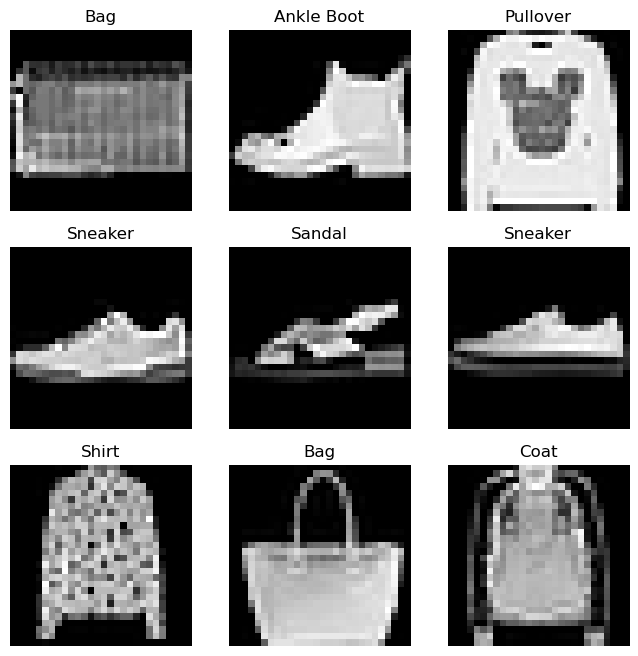

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()